# DATA ANALYST -Superstore Sales Dataset

Objective:
Analyze retail sales data to derive insights into customer behavior, popular
products, and sales trends.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv("C:\\Users\\gaura\\Downloads\\train.csv")
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# Data Exploration & Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
df.shape

(9800, 18)

In [5]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [6]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [7]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [8]:
df.isnull().sum().sort_values(ascending=False)

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [9]:
df.duplicated().any()

False

# EDA

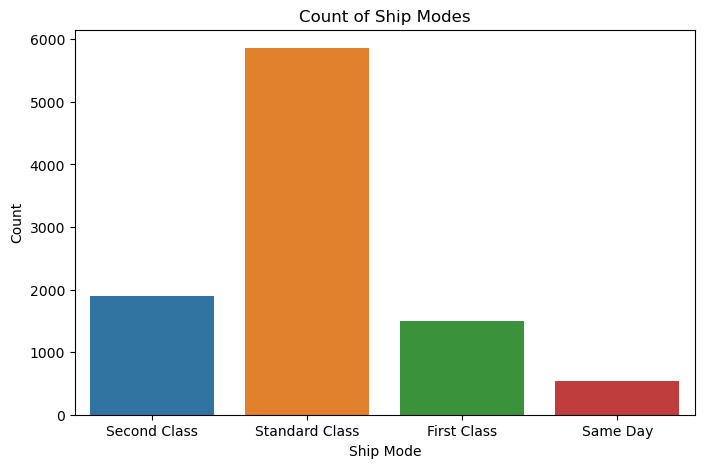

In [10]:
# Bar chart of Ship Mode counts
plt.figure(figsize=(8, 5))
sns.countplot(x='Ship Mode', data=df)
plt.title('Count of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

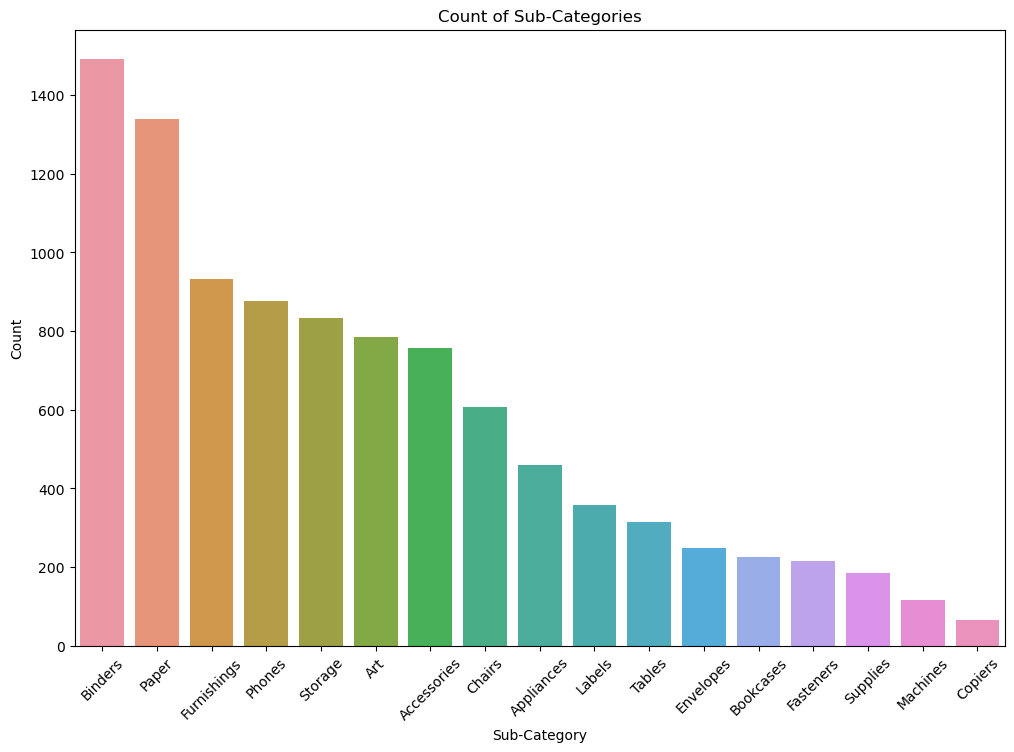

In [11]:
# Count plot of Sub-Category
plt.figure(figsize=(12, 8))
sns.countplot(x='Sub-Category', data=df, order=df['Sub-Category'].value_counts().index)
plt.title('Count of Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

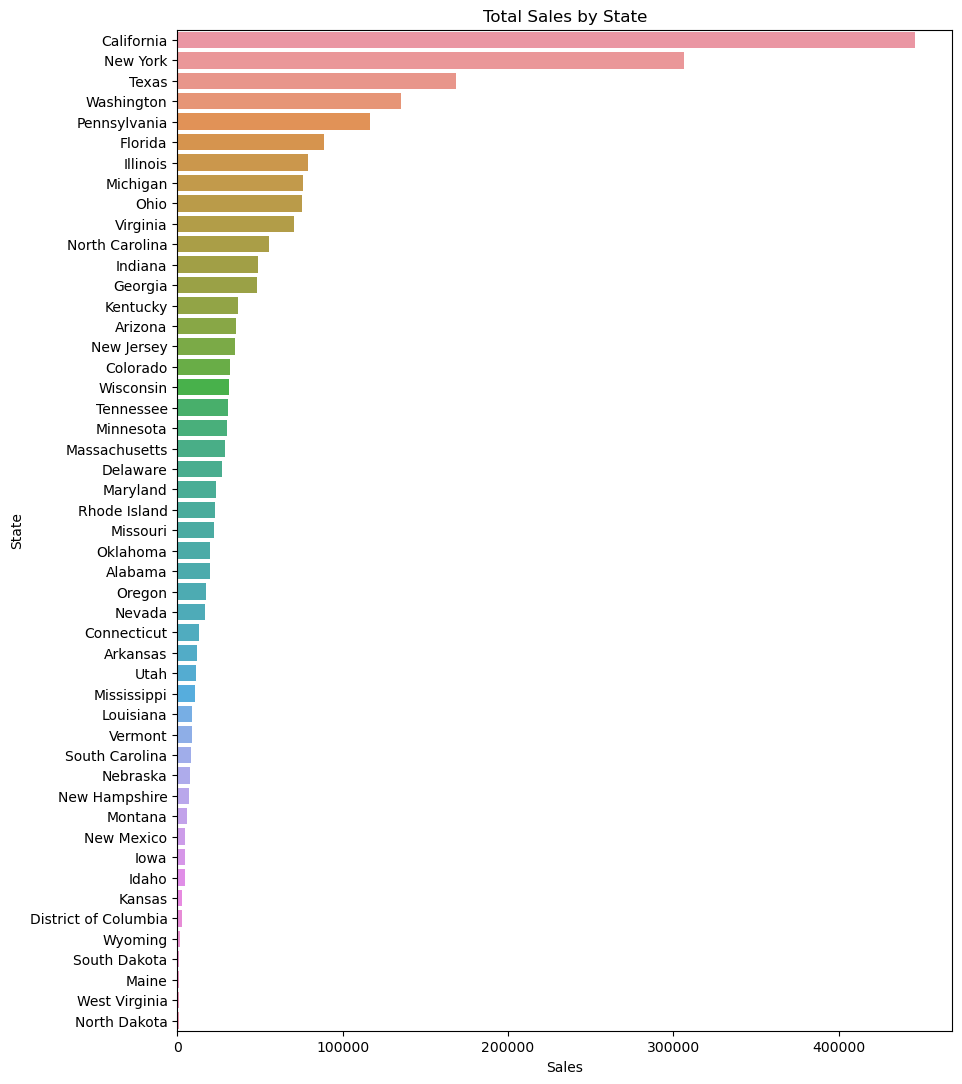

In [12]:
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales, errorbar=None)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

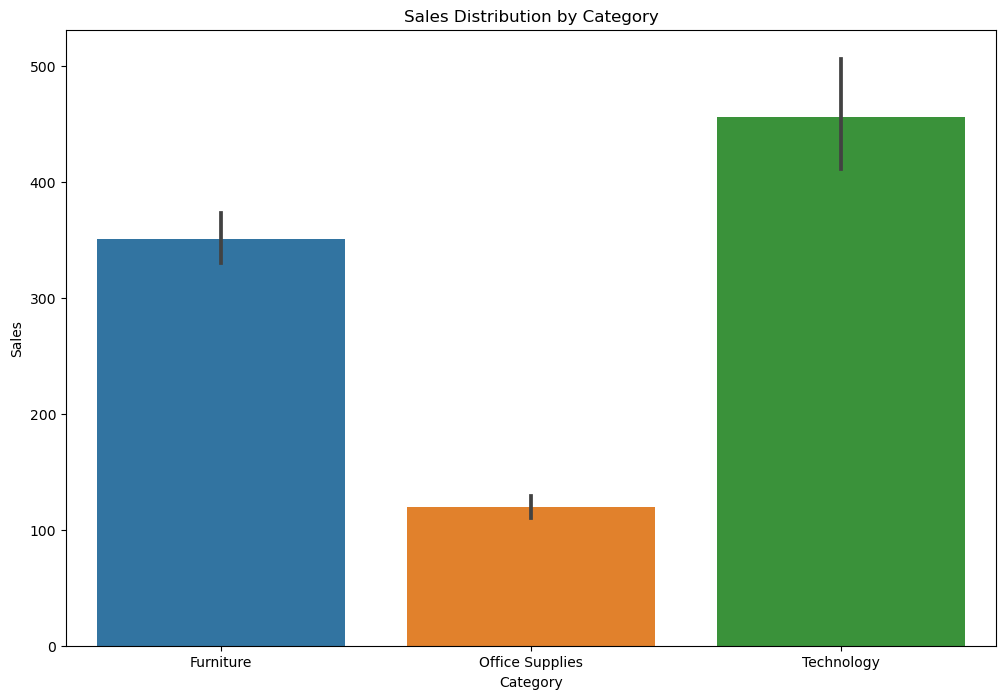

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sales', data=df)
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

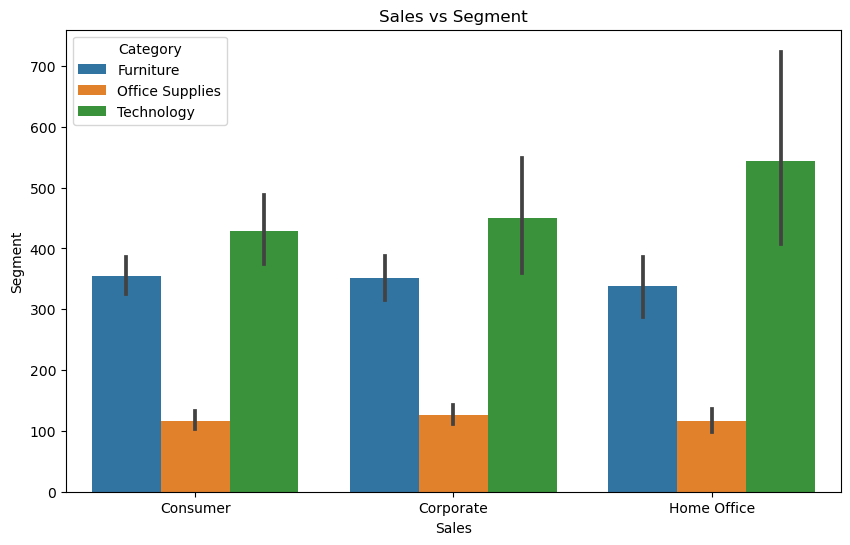

In [14]:
# Line plot of Sales vs Segment
plt.figure(figsize=(10, 6))
sns.barplot(y='Sales', x='Segment', data=df, hue='Category')
plt.title('Sales vs Segment')
plt.xlabel('Sales')
plt.ylabel('Segment')
plt.show()

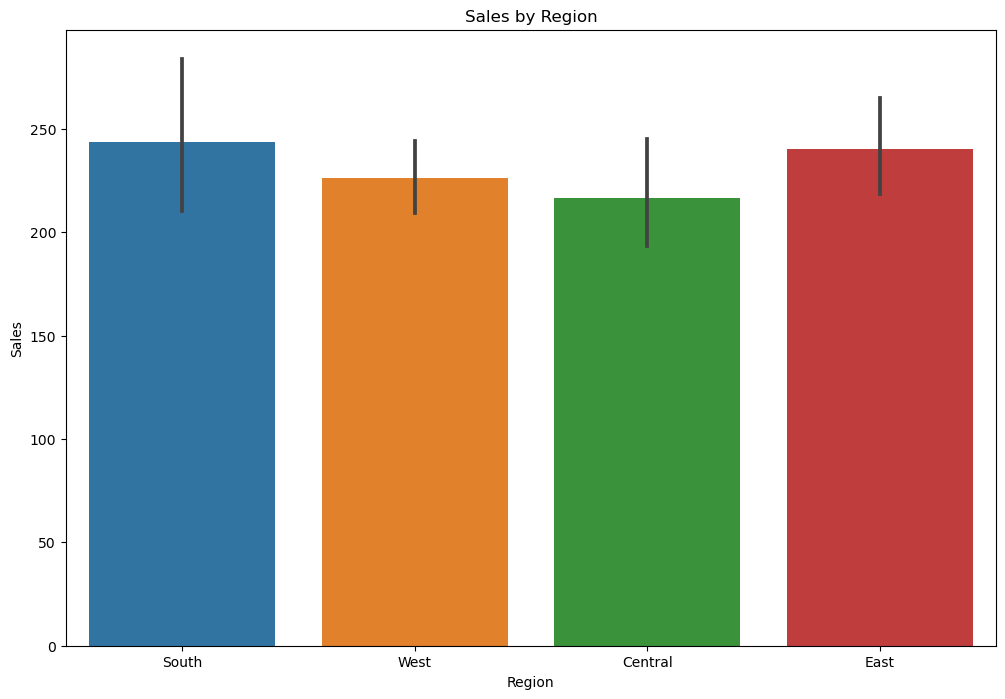

In [15]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Sales', data=df)
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Initialize Plotly in Jupyter Notebook mode
import plotly.io as pio
pio.renderers.default = 'notebook_connected'


# Create a mapping for all 50 states 
all_state_mapping = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR",
    "California": "CA", "Colorado": "CO", "Connecticut": "CT", "Delaware": "DE",
    "Florida": "FL", "Georgia": "GA", "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL",
    "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
    "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV",
    "New Hampshire": "NH", "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY",
    "North Carolina": "NC", "North Dakota": "ND", "Ohio": "OH", "Oklahoma": "OK",
    "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI", "South Carolina": "SC",
    "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}

# Add the Abbreviation column to the DataFrame
df['Abbreviation'] = df['State'].map(all_state_mapping)

# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Add Abbreviation to sum_of_sales
sum_of_sales['Abbreviation'] = sum_of_sales['State'].map(all_state_mapping)

# Create a choropleth map using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=sum_of_sales['Abbreviation'],
    locationmode='USA-states',
    z=sum_of_sales['Sales'],
    hoverinfo='location+z',
    showscale=True
))

fig.update_geos(projection_type="albers usa")
fig.update_layout(
    geo_scope='usa',
    title='Total Sales by U.S. State'
)

fig.show()

# Time Series Analysis

In [20]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

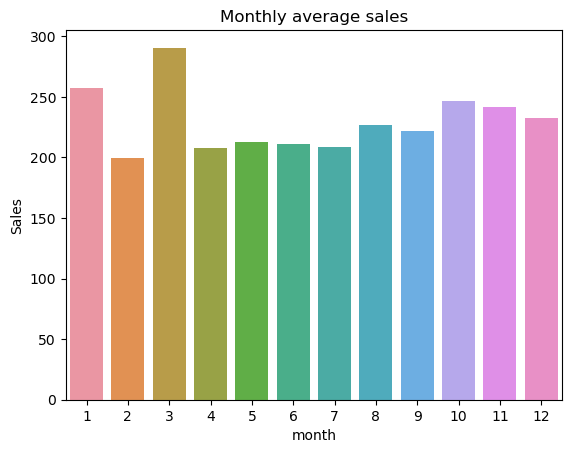

In [21]:
data_monthly_avg = df.groupby(['month']).agg({'Sales': 'mean'}).reset_index()
sns.barplot(x='month', y='Sales', data=data_monthly_avg).set(title="Monthly average sales");

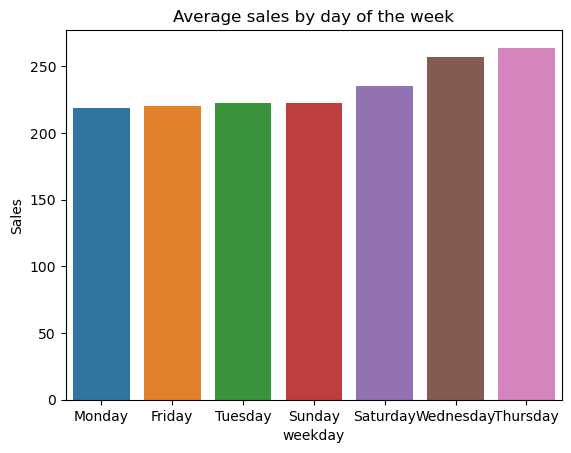

In [22]:
df['weekday'] = df['Order Date'].dt.day_name()
data_weekday = df.groupby(['weekday']).agg({'Sales': 'mean'}).reset_index()
data_weekday.sort_values(by='Sales', inplace=True)
sns.barplot(x='weekday', y='Sales', data=data_weekday).set(title="Average sales by day of the week");

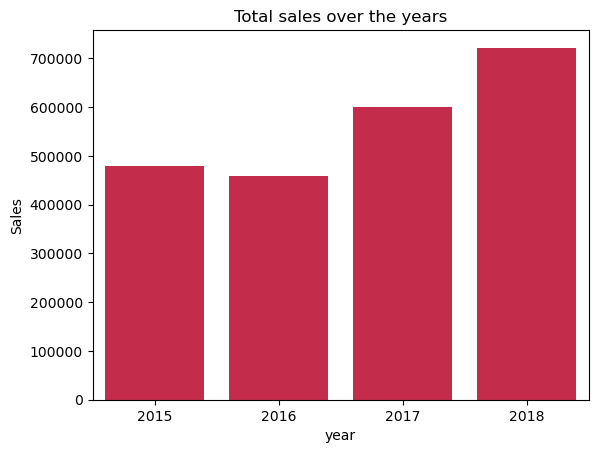

In [23]:
data_year=df.groupby('year').agg({'Sales': 'sum'}).reset_index()
ax= sns.barplot(x='year', y='Sales', data=data_year, color="crimson").set(title="Total sales over the years");

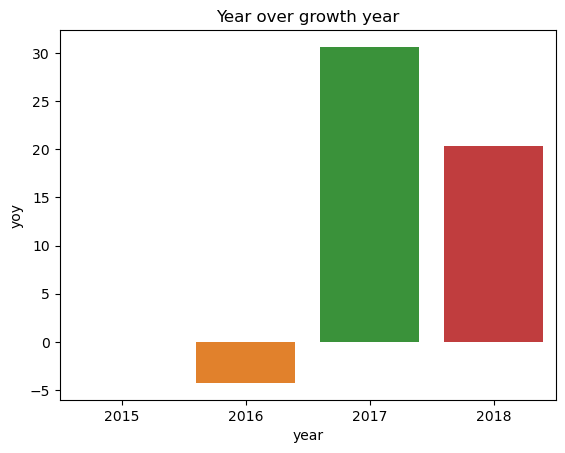

In [24]:
data_year['yoy'] = round(data_year['Sales'].pct_change()*100, 2)
sns.barplot(x='year', y='yoy', data=data_year).set(title="Year over growth year");

# # Top 10 customers

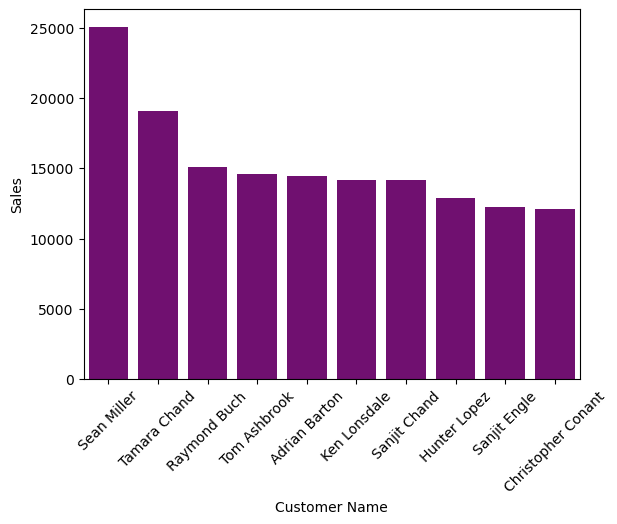

In [25]:
data_top_customer = df.groupby('Customer Name').agg({'Sales': 'sum'}).reset_index()
data_top_customer.sort_values(by='Sales',ascending=False, inplace=True)
sns.barplot(x='Customer Name', y='Sales', data=data_top_customer.head(10), color="purple");
plt.xticks(rotation=45);

# Top selling items of all times

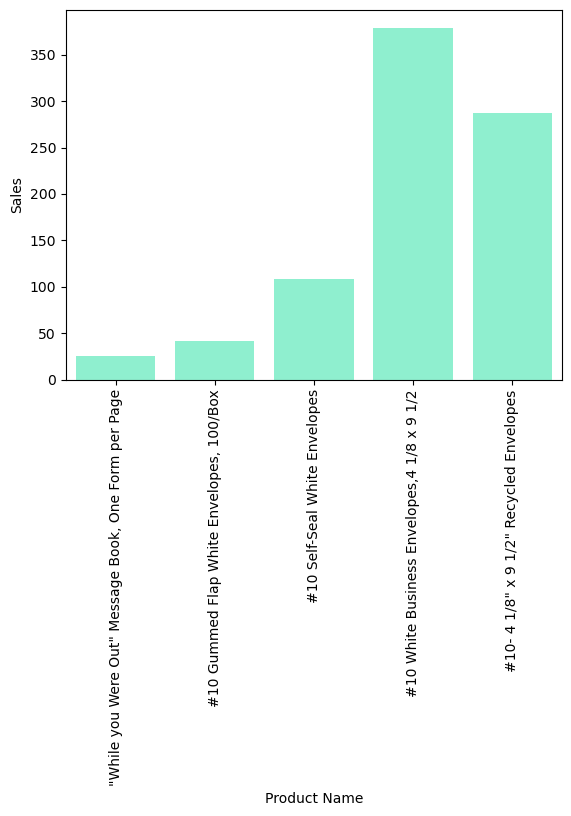

In [26]:
data_product = df.groupby(['Product Name']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Product Name', y='Sales', data=data_product.head(5), color="aquamarine")
plt.xticks(rotation=90);

In [28]:
df['Category'].value_counts()

Category
Office Supplies    5909
Furniture          2078
Technology         1813
Name: count, dtype: int64

In [29]:
lable= df['Category'].value_counts().index.to_list()
lable

['Office Supplies', 'Furniture', 'Technology']

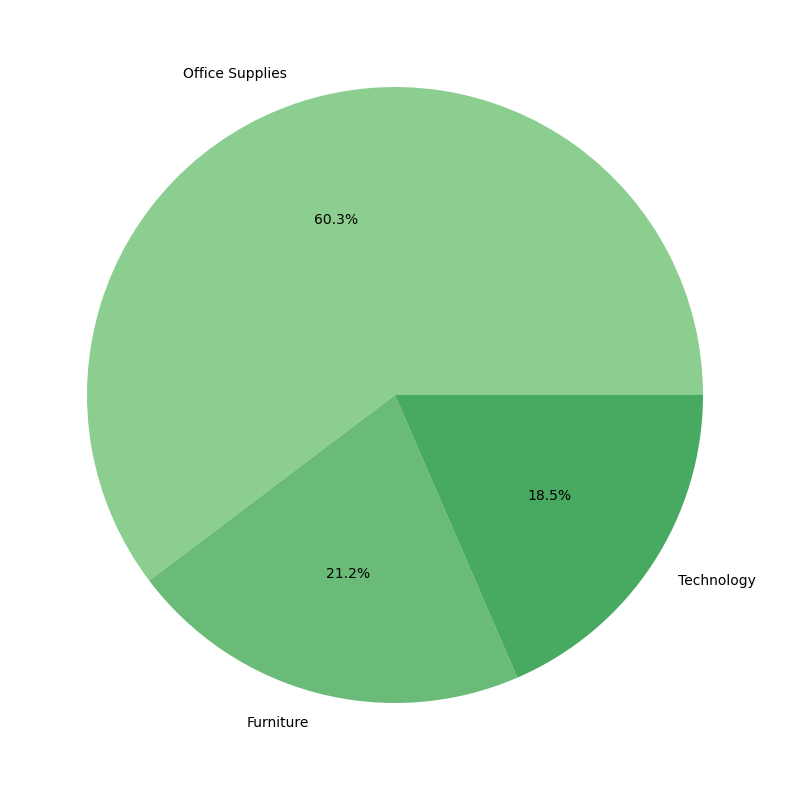

In [31]:
plt.figure(figsize=(10,10))
plt.pie(df['Category'].value_counts(),labels=lable, autopct='%1.1f%%', colors=sns.color_palette("Greens_d"))
plt.show()

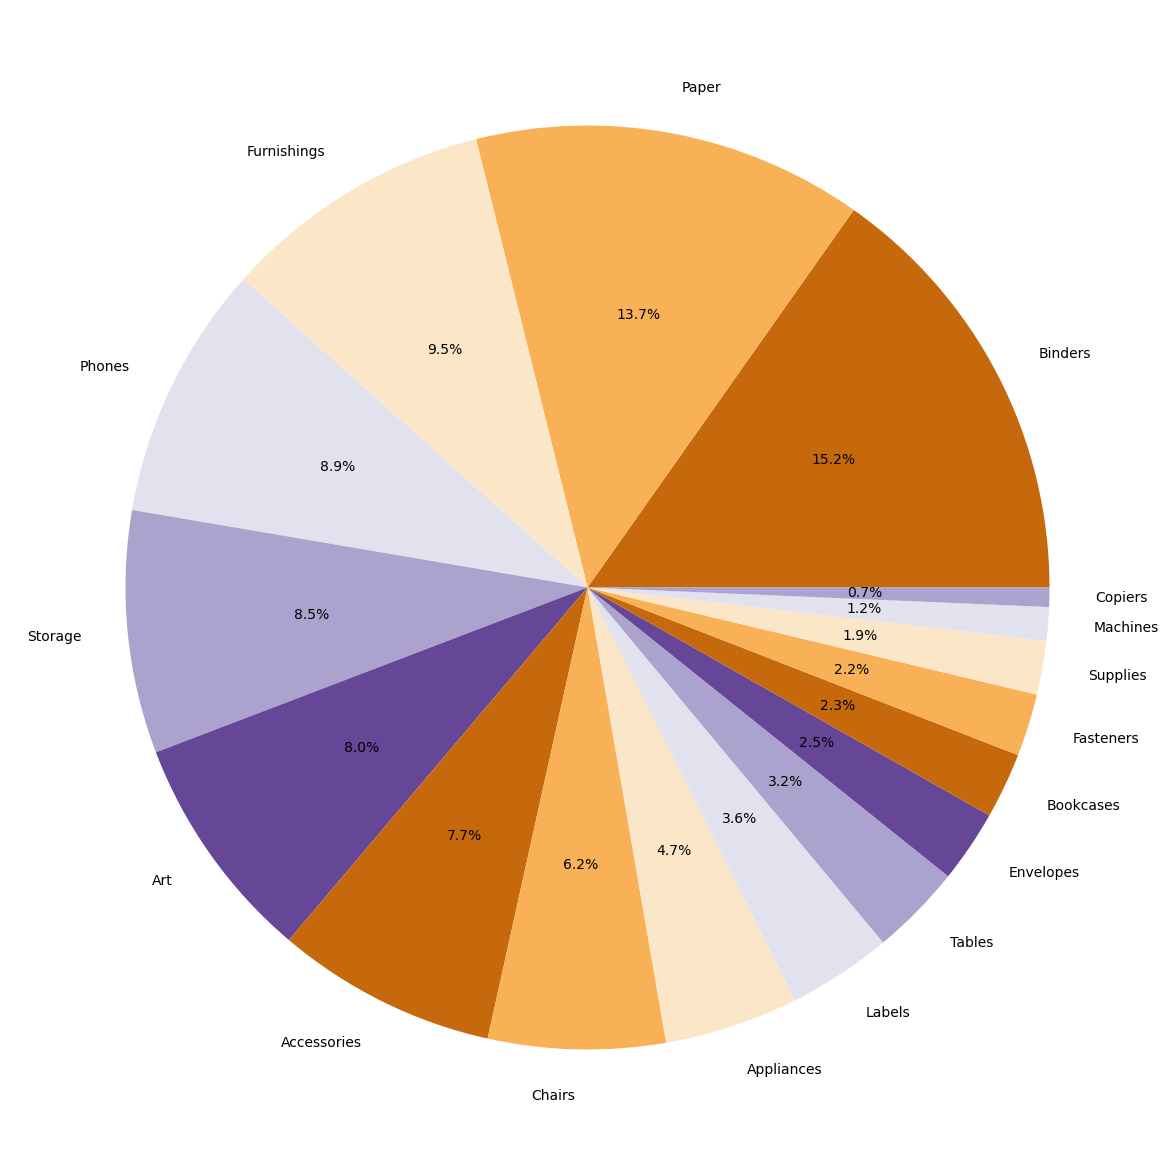

In [32]:
sub_lable= df['Sub-Category'].value_counts().index.to_list()
plt.figure(figsize=(15,15))
plt.pie(df['Sub-Category'].value_counts(),labels=sub_lable, autopct='%1.1f%%', colors=sns.color_palette("PuOr"))
plt.show()

# Conclusion and Recommendations

During this sales analysis project, I delved into the Superstore dataset spanning from 2015 to 2019 with the aim of uncovering insights into the store's performance, customer behavior, and revenue trends. Here's a summary of the key findings and conclusions:



Revenue Growth: Throughout the analysis, a consistent upward trend in revenue was observed, indicating the overall prosperity of the store. Notably, a significant spike in sales occurred every November, likely driven by the Black Friday shopping frenzy, while a decline was evident in January post the holiday season.

Customer Segmentation: The dataset revealed three primary customer segments: Consumer, Corporate, and Home Office, with the Consumer segment being the most dominant. Further exploration of each segment's unique behaviors could provide valuable insights for crafting targeted marketing strategies.

Category Analysis: Among the product categories, Technology emerged as the top revenue generator, closely followed by Furniture and Office Supplies. A deeper dive into the Technology category and its sub-categories could unveil opportunities for more focused strategies.

Identifying Valuable Customers: Recognizing high-value customers is crucial for effective customer retention and the implementation of personalized marketing tactics. I identified the top customers who significantly contributed to the store's revenue.

Average Order Value Stability: The average order value remained relatively stable throughout the analyzed period, showing minor fluctuations. This metric serves as a key indicator for understanding customer spending patterns.

In summary, 
- Make offers is important
- increase staple envelope
- decrease the product is sold less than 5 times
- make interests to Binders and Papers
- don't export a lot of expensive Technology products because it rarely sold
- make discount on product that rarely sold .